# Training a matrix to be the identity function on a linear subspace

1. Pick random basis vectors for a linear subspace
2. Randomly sample elements of this subspace
3. Train using gradient descent a matrix $M$ to be the identity matrix on this subspace.
4. Visualize this matrix $M$
5. Visualize $Mv$ for $v$ from the subspace
6. Visualize $Mv$ for $v$ uniform random from $R^n$
7. Visualize the eigenspectrum for $M$




## 1.-4.

tf.Tensor(0.009930874, shape=(), dtype=float32)


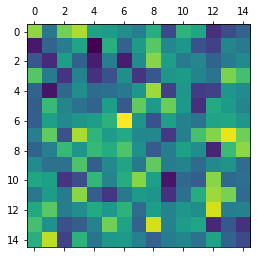

In [34]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#1.
N = 15
s = 5
B = tf.random.uniform((N,s),minval=-1.,maxval=1.)

#2.
data = tf.matmul(B, tf.random.uniform((s,1000),minval=-1.,maxval=1.))

#3.
M = tf.Variable(tf.random.uniform((N,N),minval=-1.,maxval=1.),trainable=True)

opt = tf.optimizers.RMSprop(1e-3)

output = tf.matmul(M,data)
error = tf.reduce_mean(tf.norm(output-data,axis=0))

while error > 0.01:  
  with tf.GradientTape() as tape:
    output = tf.matmul(M,data)
    error = tf.reduce_mean(tf.norm(output-data,axis=0))
    g = tape.gradient(error, M)
  opt.apply_gradients([(g,M)])


print(error)
plt.matshow(M.numpy())  


## 5.-6.

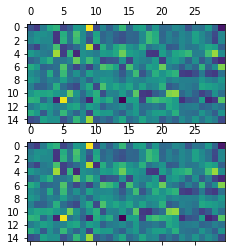

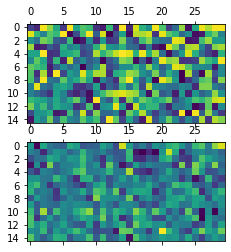

In [35]:
data = tf.matmul(B, tf.random.uniform((s,30),minval=-1.,maxval=1.))
output = tf.matmul(M, data)

fig, axes = plt.subplots(2,1)
axes[0].matshow(data)
axes[1].matshow(output)
plt.show()


rdata = tf.random.uniform((15,30),minval=-1.,maxval=1.)
routput = tf.matmul(M, rdata)

fig, axes = plt.subplots(2,1)
axes[0].matshow(rdata)
axes[1].matshow(routput)
plt.show()

##7.

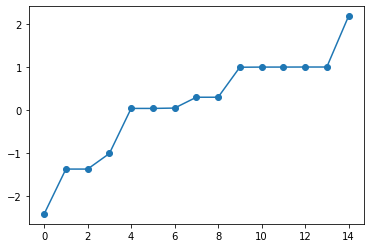

In [36]:
evals, evecs = tf.eig(M)
# print(evals,evecs)
plt.plot(tf.sort(tf.math.real(evals)),marker='o')